In [17]:
#Code for extracting statistical features mentioned in this link 'https://github.com/light-curve/light-curve-python'
#importing useful Python libraries
import pandas as pd
import light_curve as lc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the file
df = pd.read_csv("lightcurves_grouped_r_clean.csv")

print("✅ DataFrame loaded with shape:", df.shape)
print(df.head())

✅ DataFrame loaded with shape: (140, 25)
       object                                                oid  \
0    V479 And  648209100001736;648209100001736;64820910000173...   
1   V1309 Ori  457201400006865;457201400006865;45720140000686...   
2      AI Tri  652203400004823;652203400004823;65220340000482...   
3      MQ Dra  794210400014259;794210400014259;79421040001425...   
4  J2048+0050  440215100004767;440215100004767;44021510000476...   

                                               expid  \
0  51444796;51744365;51943052;52046682;52047856;5...   
1  58448195;59047807;59648598;59944752;60244373;6...   
2  52848159;53446642;54048247;54342804;54642347;5...   
3  44436270;44438748;44440531;44442988;44447700;4...   
4  49347447;50046093;50341848;50346002;52046075;5...   

                                                 hjd  \
0  2458268.9448206285;2458271.9407102177;2458273....   
1  2458338.979216509;2458344.9758162564;2458350.9...   
2  2458282.9776469944;2458288.9628736307;2458

In [18]:
# Define extractor with all features
# definition of all extracted features is reported to my Overleaf file
extractor = lc.Extractor(
    lc.Mean(), #Mean magnitude
    lc.WeightedMean(),
    lc.StandardDeviation(),
    lc.Median(),
    lc.Amplitude(),
    lc.BeyondNStd(nstd=1),
    lc.Cusum(),
    lc.InterPercentileRange(0.10),
    lc.Kurtosis(),
    lc.LinearTrend(),
    lc.LinearFit(),   # slope, slope_sigma, reduced_chi2
    lc.MagnitudePercentageRatio(0.4, .05),
    lc.MagnitudePercentageRatio(0.2, 0.1),
    lc.MaximumSlope(),
    lc.MedianAbsoluteDeviation(),
    lc.MedianBufferRangePercentage(0.10),
    lc.PercentAmplitude(),
    lc.MeanVariance(),
    lc.AndersonDarlingNormal(),
    lc.ReducedChi2(),
    lc.Skew(),
    lc.StetsonK()
)

In [19]:
# Function to parse semicolon-separated arrays
def parse_array(x):
    return np.array([float(v) for v in str(x).split(";") if v != ""])
# Collect results
results = [] #empty array to store results
#Iterate through each row of the DataFrame (each row = one object)
for _, row in df.iterrows():
    try:
        t = parse_array(row["hjd"]) #time array for heleocentric julian date
        m = parse_array(row["mag"]) #magnitude column
        err = parse_array(row["magerr"]) #error
        feats = extractor(t, m, err, sorted=True, check=False)
        results.append([row["object"]] + list(feats))
    except Exception as e:
        print(f" Skipping {row['object']} due to error: {e}")

# Create DataFrame with proper headers
features_df = pd.DataFrame(results, columns=["object"] + extractor.names)

# Save to CSV and Excel
features_df.to_csv("lightcurve_features_26.csv", index=False)
#features_df.to_excel("lightcurve_features_26.xlsx", index=False)
features_df.to_parquet("lightcurve_features_26.parquet", index=False)
print(" Feature extraction complete! Saved to:")
print("   - lightcurve_features_26.csv")
#print("   - lightcurve_features_26.xlsx")
print("   - lightcurve_features_26.parquet")


 Skipping PW Aqr due to error: time-series' length 3 is smaller than the minimum required length 4
 Feature extraction complete! Saved to:
   - lightcurve_features_26.csv
   - lightcurve_features_26.parquet


In [20]:
#PW Aqr simply has too few observations

df = pd.read_parquet("lightcurve_features_26.parquet")
df.head() # show first 5 rows


,object,mean,weighted_mean,standard_deviation,median,amplitude,beyond_1_std,cusum,inter_percentile_range_10,kurtosis,...,magnitude_percentage_ratio_20_10,maximum_slope,median_absolute_deviation,median_buffer_range_percentage_10,percent_amplitude,mean_variance,anderson_darling_normal,chi2,skew,stetson_K
0,V479 And,17.268163,17.236716,0.180454,17.273849,0.666252,0.328125,0.069825,0.460431,-0.035883,...,0.675921,1047.466565,0.125532,0.280777,0.733604,0.010450,2.085659,94.693020,-0.271274,0.798775
1,V1309 Ori,15.720073,15.634069,0.449468,15.607049,1.007579,0.246479,0.091691,1.249109,0.613096,...,0.504922,183.955383,0.220738,0.232394,1.347842,0.028592,30.141442,1144.025302,1.107530,0.780070
2,AI Tri,16.339606,16.129012,0.641042,16.161560,1.392405,0.314172,0.314640,1.735063,-0.395987,...,0.668416,210.960538,0.373932,0.203171,1.838871,0.039232,25.523250,1301.845213,0.746145,0.831868
3,MQ Dra,17.466180,17.337143,0.364589,17.434200,0.712118,0.456381,0.050537,0.961357,-1.401971,...,0.821901,188.001161,0.332115,0.095890,0.720089,0.020874,34.268952,309.597087,0.125844,0.896494
4,J2048+0050,18.698472,18.666318,0.148085,18.703554,0.457648,0.323529,0.235844,0.393805,-0.192066,...,0.649716,187.900246,0.099949,0.237395,0.486221,0.007920,0.486493,11.527544,-0.182791,0.806461


In [21]:
#for correlation matrix formation
# Load your parquet file
df_pos= pd.read_csv("lightcurve_features_26.csv")

# Check shape and columns
print(df_pos.shape)
print(df_pos.columns)

(139, 27)
Index(['object', 'mean', 'weighted_mean', 'standard_deviation', 'median',
       'amplitude', 'beyond_1_std', 'cusum', 'inter_percentile_range_10',
       'kurtosis', 'linear_trend', 'linear_trend_sigma', 'linear_trend_noise',
       'linear_fit_slope', 'linear_fit_slope_sigma', 'linear_fit_reduced_chi2',
       'magnitude_percentage_ratio_40_5', 'magnitude_percentage_ratio_20_10',
       'maximum_slope', 'median_absolute_deviation',
       'median_buffer_range_percentage_10', 'percent_amplitude',
       'mean_variance', 'anderson_darling_normal', 'chi2', 'skew',
       'stetson_K'],
      dtype='object')


In [22]:
#taking numeric values only
features_pos = df_pos.drop(columns=['object'])

In [23]:
features_pos

,mean,weighted_mean,standard_deviation,median,amplitude,beyond_1_std,cusum,inter_percentile_range_10,kurtosis,linear_trend,...,magnitude_percentage_ratio_20_10,maximum_slope,median_absolute_deviation,median_buffer_range_percentage_10,percent_amplitude,mean_variance,anderson_darling_normal,chi2,skew,stetson_K
0,17.268163,17.236716,0.180454,17.273849,0.666252,0.328125,0.069825,0.460431,-0.035883,0.000063,...,0.675921,1047.466565,0.125532,0.280777,0.733604,0.010450,2.085659,94.693020,-0.271274,0.798775
1,15.720073,15.634069,0.449468,15.607049,1.007579,0.246479,0.091691,1.249109,0.613096,-0.000009,...,0.504922,183.955383,0.220738,0.232394,1.347842,0.028592,30.141442,1144.025302,1.107530,0.780070
2,16.339606,16.129012,0.641042,16.161560,1.392405,0.314172,0.314640,1.735063,-0.395987,0.000045,...,0.668416,210.960538,0.373932,0.203171,1.838871,0.039232,25.523250,1301.845213,0.746145,0.831868
3,17.466180,17.337143,0.364589,17.434200,0.712118,0.456381,0.050537,0.961357,-1.401971,-0.000055,...,0.821901,188.001161,0.332115,0.095890,0.720089,0.020874,34.268952,309.597087,0.125844,0.896494
4,18.698472,18.666318,0.148085,18.703554,0.457648,0.323529,0.235844,0.393805,-0.192066,-0.000016,...,0.649716,187.900246,0.099949,0.237395,0.486221,0.007920,0.486493,11.527544,-0.182791,0.806461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,18.671137,18.005896,0.667842,18.821958,2.217793,0.291949,0.118164,1.638803,0.411894,0.000382,...,0.699795,876.202363,0.346756,0.323305,2.350385,0.035769,39.873625,236.987457,-0.270697,0.867077
135,16.484749,15.824940,1.277268,15.927287,3.458767,0.197170,0.399077,2.922088,0.774495,0.000021,...,0.633470,511.649845,0.401111,0.449057,4.282358,0.077482,54.374314,1846.387887,1.046409,0.765372
136,15.821274,15.817911,0.129693,15.831488,0.456778,0.285256,0.165112,0.307883,1.460111,-0.000033,...,0.674872,319.386942,0.083125,0.283120,0.603597,0.008197,5.386825,57.958513,-0.836126,0.771527
137,15.065602,15.061809,0.130195,15.058796,0.851724,0.234031,0.126656,0.282931,11.467774,0.000014,...,0.648587,481.357576,0.073278,0.566422,1.138424,0.008642,14.493014,122.249458,1.618830,0.727076


In [24]:
#correlation calculation
corr_pos = features_pos.corr()

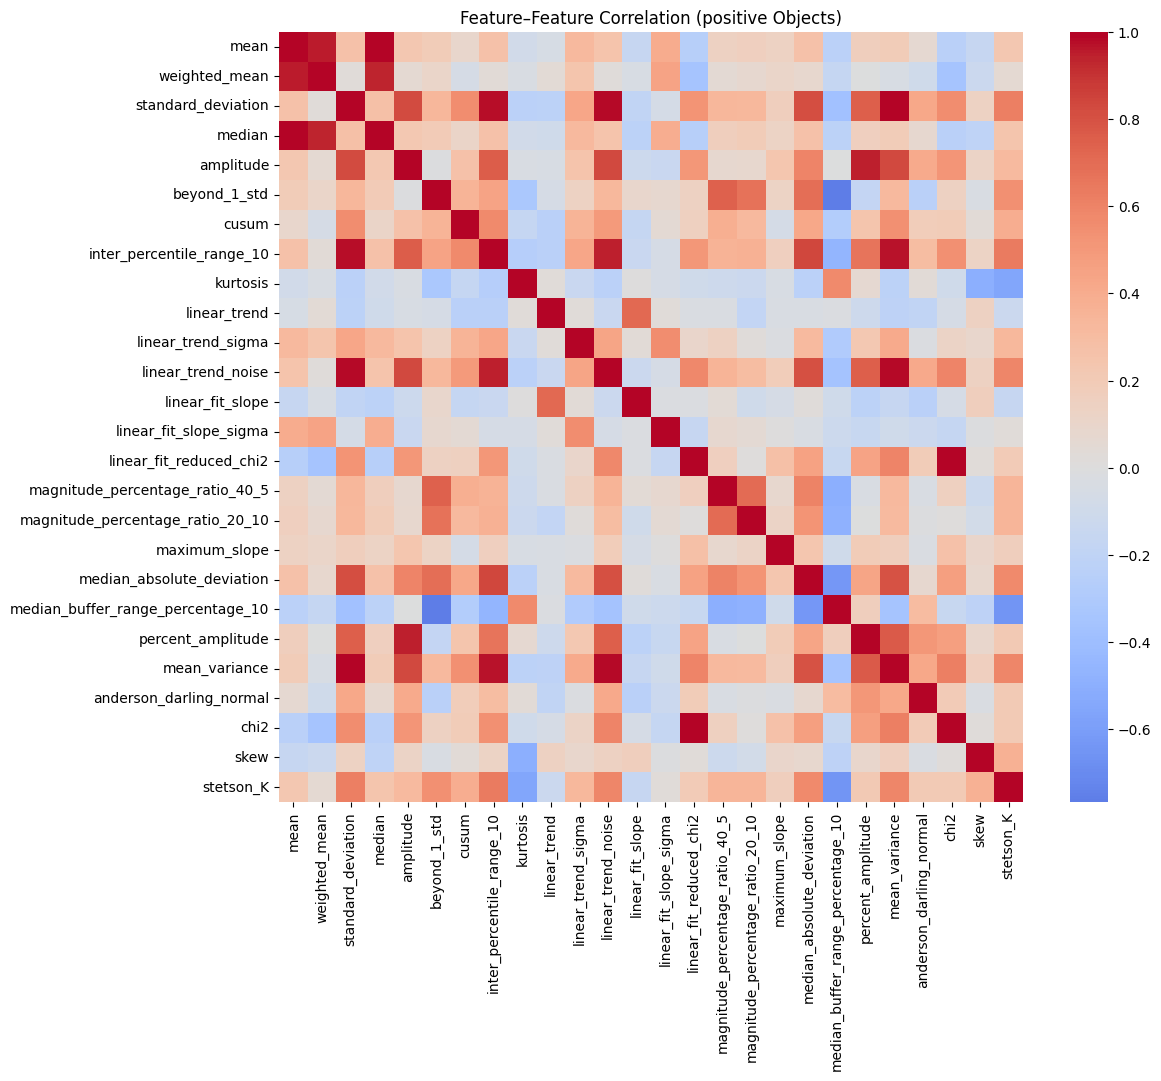

In [27]:
#heatmap plotting
plt.figure(figsize=(12, 10))
sns.heatmap(corr_pos, cmap='coolwarm', center=0)
plt.title('Feature–Feature Correlation (positive Objects)')
#plt.tight_layout()
plt.show()